In [1]:
from normalizer import Normalizer
from backup_manager import BackupManager
from data_diagnostics import DataDiagnostics

In [2]:
max_files = 5
files = BackupManager.detect_files("data/main")
print(f"#files found {len(files)}")
files = files[:max_files]
raw_data, raw_parameters, _ = BackupManager.load_data(files)
print(raw_data.shape)

#files found 230


Loading files:   0%|          | 0/5 [00:00<?, ?it/s]

torch.Size([2500, 1000, 4])


In [3]:
normalizer = Normalizer.create_normalizer(raw_data)
data = normalizer.normalize_data(raw_data)
parameters = normalizer.normalize_parameters(raw_parameters)

In [4]:
DataDiagnostics.data_unicity(data, parameters)

Parameters unicity rate 0.5672 (normal to be low if many parameters)
Data average unicity rate 0.5618295669555664 (>0.95 needed), data min unicity rate 0.35199999809265137


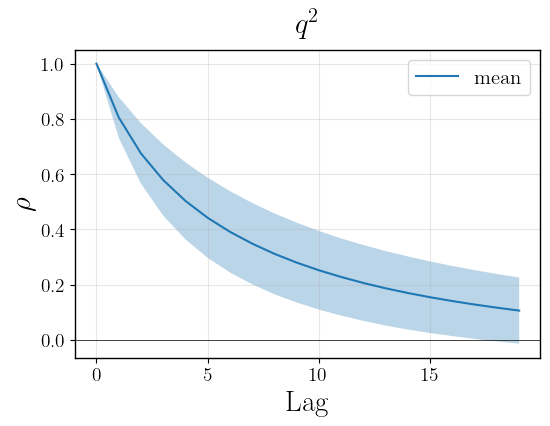

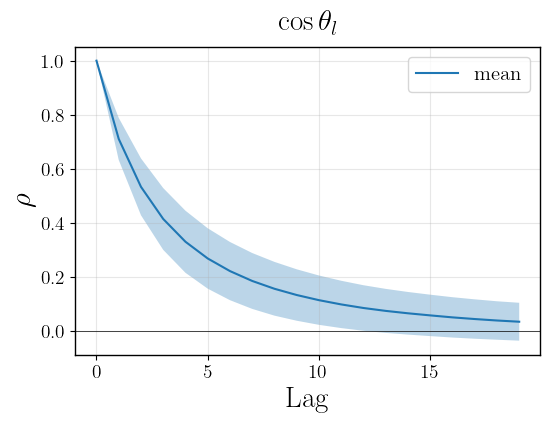

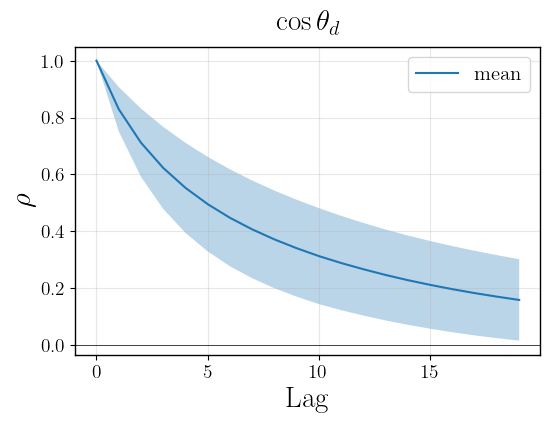

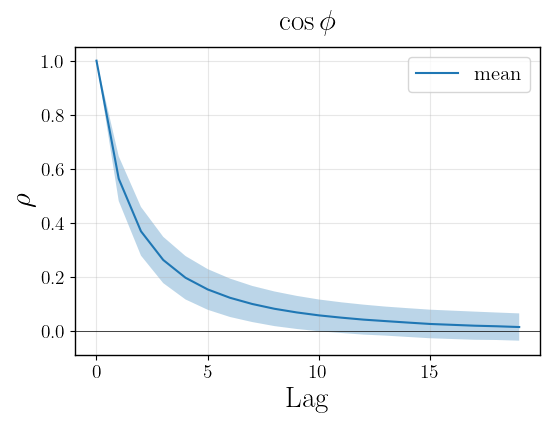

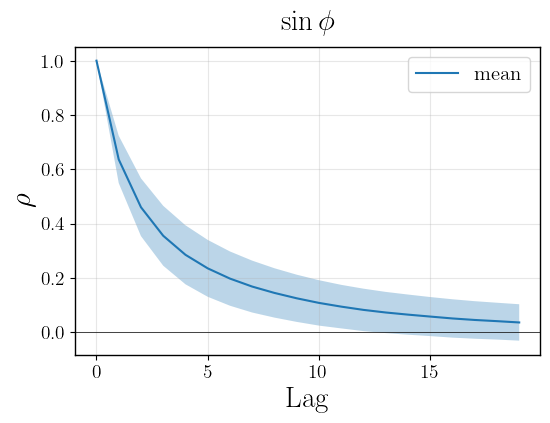

ESS min 55.46267318725586
ESS's [70.36772918701172, 124.8664779663086, 55.46267318725586, 202.6081085205078, 137.5093231201172]
Decorrelation lag [20, 11, 26, 7, 11]


In [6]:
DataDiagnostics.data_autocorrelation(data, lag_zoom=20)